In [2]:
import pandas as pd
from pathlib import Path

# Set folder path (modify according to your local path)
folder = Path("/Users/viewyan/Documents/Datalab2025/4th meeting")

# List of files
files = [
    "45_fingerprints_grouped_avg_energy.csv",
    "120_fingerprints_grouped_avg_energy.csv"
]

def split_csv_by_label(filepath):
    df = pd.read_csv(filepath)
    base = filepath.stem.split("_")[0]  # Extract '45' or '120'

    # Split into three categories
    df_CO2 = df[df['mof_name'].str.contains('_CO2', na=False)]
    df_H2O = df[df['mof_name'].str.contains('_H2O', na=False)]
    df_plain = df[~df['mof_name'].str.contains('_CO2|_H2O', na=False)]

    # Save files
    df.to_csv(filepath.parent / f"{base}_fingerprints_all.csv", index=False)
    df_CO2.to_csv(filepath.parent / f"{base}_fingerprints_CO2.csv", index=False)
    df_H2O.to_csv(filepath.parent / f"{base}_fingerprints_H2O.csv", index=False)
    df_plain.to_csv(filepath.parent / f"{base}_fingerprints_plain.csv", index=False)

    print(f"{base} Done: All={len(df)}, CO2={len(df_CO2)}, H2O={len(df_H2O)}, Plain={len(df_plain)}")

# Run the splitting function
for fname in files:
    split_csv_by_label(folder / fname)


45 Done: All=9183, CO2=4601, H2O=4582, Plain=0
120 Done: All=9183, CO2=4601, H2O=4582, Plain=0


In [4]:
from pathlib import Path

path_45 = Path("/Users/viewyan/Documents/Datalab2025/4th meeting/45_fingerprints_grouped_avg_energy.csv")
path_120 = Path("/Users/viewyan/Documents/Datalab2025/4th meeting/120_fingerprints_grouped_avg_energy.csv")

def split_plain_energy_file(filepath):
    df = pd.read_csv(filepath)
    name_col = 'mof_name'
    base = filepath.stem.split("_")[0]

    df_CO2 = df[df[name_col].str.contains('_CO2', na=False)].copy()
    df_H2O = df[df[name_col].str.contains('_H2O', na=False)].copy()

    # romove tag
    df_CO2[name_col] = df_CO2[name_col].str.replace('_CO2.*', '', regex=True)
    df_H2O[name_col] = df_H2O[name_col].str.replace('_H2O.*', '', regex=True)

    df_CO2.to_csv(filepath.parent / f"plain_fingerprint_{base}_CO2_energy.csv", index=False)
    df_H2O.to_csv(filepath.parent / f"plain_fingerprint_{base}_H2O_energy.csv", index=False)
    print(f"{base} done: CO2={len(df_CO2)}, H2O={len(df_H2O)}")

split_plain_energy_file(path_45)
split_plain_energy_file(path_120)


45 done: CO2=4601, H2O=4582
120 done: CO2=4601, H2O=4582


In [124]:
#Mix 45

f45_CO2 = Path("/Users/viewyan/Documents/Datalab2025/4th meeting/plain_fingerprint_45_CO2_energy.csv")
f45_H2O = Path("/Users/viewyan/Documents/Datalab2025/4th meeting/plain_fingerprint_45_H2O_energy.csv")

df_CO2 = pd.read_csv(f45_CO2)
df_H2O = pd.read_csv(f45_H2O)

df_mixed = pd.concat([df_CO2, df_H2O], ignore_index=True)
df_mixed.to_csv(f45_CO2.parent / "plain_fingerprint_45_mixed_energy.csv", index=False)
print("Mixed dataset saved.")


Mixed dataset saved.


In [126]:
# Mix!them
df_mixed = pd.concat([df_CO2, df_H2O], ignore_index=True)

# check how many name is repeated
dupes = df_mixed['mof_name'].value_counts()
print("Rpeated times：")
print(dupes.value_counts())

# only shows more than 3 times name）
print("\nrepeated times more than 3：")
print(dupes[dupes > 2])


Rpeated times：
count
2    4548
1      87
Name: count, dtype: int64

repeated times more than 3：
Series([], Name: count, dtype: int64)


In [122]:
#Mix 120
f120_CO2 = Path("/Users/viewyan/Documents/Datalab2025/4th meeting/plain_fingerprint_120_CO2_energy.csv")
f120_H2O = Path("/Users/viewyan/Documents/Datalab2025/4th meeting/plain_fingerprint_120_H2O_energy.csv")

df_CO2 = pd.read_csv(f120_CO2)
df_H2O = pd.read_csv(f120_H2O)

df_mixed = pd.concat([df_CO2, df_H2O], ignore_index=True)
df_mixed.to_csv(f120_CO2.parent / "plain_fingerprint_120_mixed_energy.csv", index=False)
print("Mixed dataset saved.")


Mixed dataset saved.


In [125]:
df_mixed2 = pd.concat([df_CO2, df_H2O], ignore_index=True)


dupes = df_mixed2['mof_name'].value_counts()
print("Repeated times")
print(dupes.value_counts())

# 只显示那些出现多次的 mof_name（比如重复了 3 次及以上的）
print("\nrepeated times more than 3：")
print(dupes[dupes > 2])


repeated times
count
2    4548
1      87
Name: count, dtype: int64

repeated times more than 3：
Series([], Name: count, dtype: int64)


In [94]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [95]:
pip install xgboost lightgbm

Note: you may need to restart the kernel to use updated packages.


In [100]:
!brew install libomp

==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
abpoa                      kargo                      pulumictl
benchi                     kraken2                    rasusa
blueprint-compiler         ktop                       reckoner
breseq                     ldcli                      ropebwt3
btcli                      libbsc                     samply
clang-include-graph        libpq@16                   sprocket
claude-squad               lzsa                       sqruff
crd2pulumi                 mongo-c-driver@1           stringtie
credo                      nova                       tabixpp
dvisvgm                    nx                         tfmcp
elf2uf2-rs                 osx-trash                  tldx
fastk                      oterm

In [132]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor
import lightgbm as lgb
import numpy as np

# Set base folder path
base_folder = Path("/Users/viewyan/Documents/Datalab2025/4th meeting")

# Input CSV files
csv_files = {
    "CO2-45": "45_fingerprints_CO2.csv",
    "H2O-45": "45_fingerprints_H2O.csv",
    "CO2-120": "120_fingerprints_CO2.csv",
    "H2O-120": "120_fingerprints_H2O.csv",
    "Plain-45": "plain_fingerprint_45_mixed_energy.csv",
    "Plain-120": "plain_fingerprint_120_mixed_energy.csv",
}

#  Define regression models
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "LightGBM": lgb.LGBMRegressor(random_state=42),
    "MLP": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42),
    "ExtraTrees": ExtraTreesRegressor(random_state=42),
}

#  Store results
results = []

#  Main loop
for label, filename in csv_files.items():
    path = base_folder / filename
    df = pd.read_csv(path).dropna()

    X = df.drop(columns=["mof_name", "energy"])
    y = df["energy"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)

        results.append({
            "Dataset": label,
            "Model": model_name,
            "RMSE": rmse,
            "MAE": mae
        })

#  Display results
results_df = pd.DataFrame(results)
print(results_df)

#  Save results to CSV (optional)
results_df.to_csv("baseline_model_comparison.csv", index=False)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7099
[LightGBM] [Info] Number of data points in the train set: 935, number of used features: 44
[LightGBM] [Info] Start training from score -0.075394
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7107
[LightGBM] [Info] Number of data points in the train set: 937, number of used features: 40
[LightGBM] [Info] Start training from score -0.212213
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4108
[LightGBM] [Info] Number of data points in the train set: 

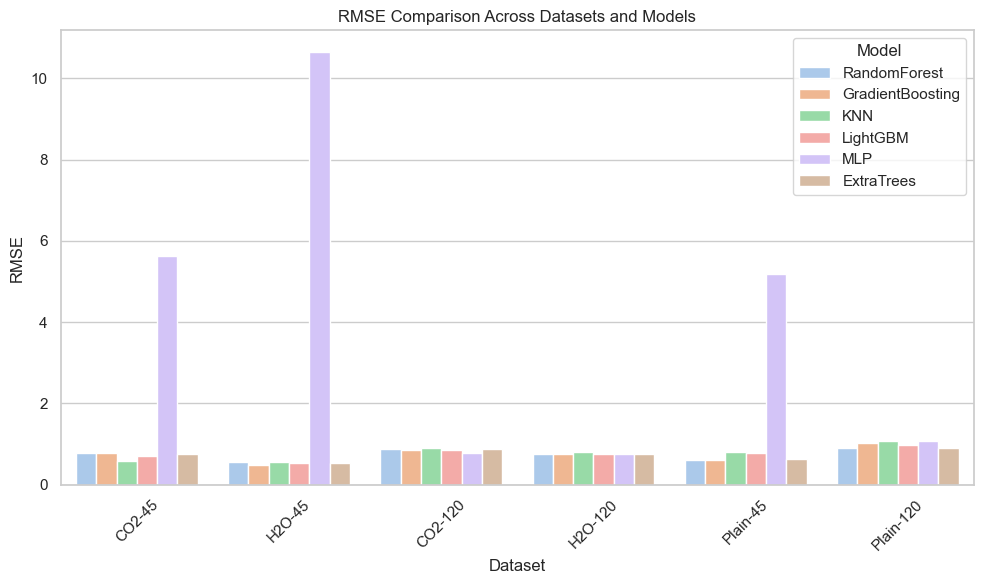

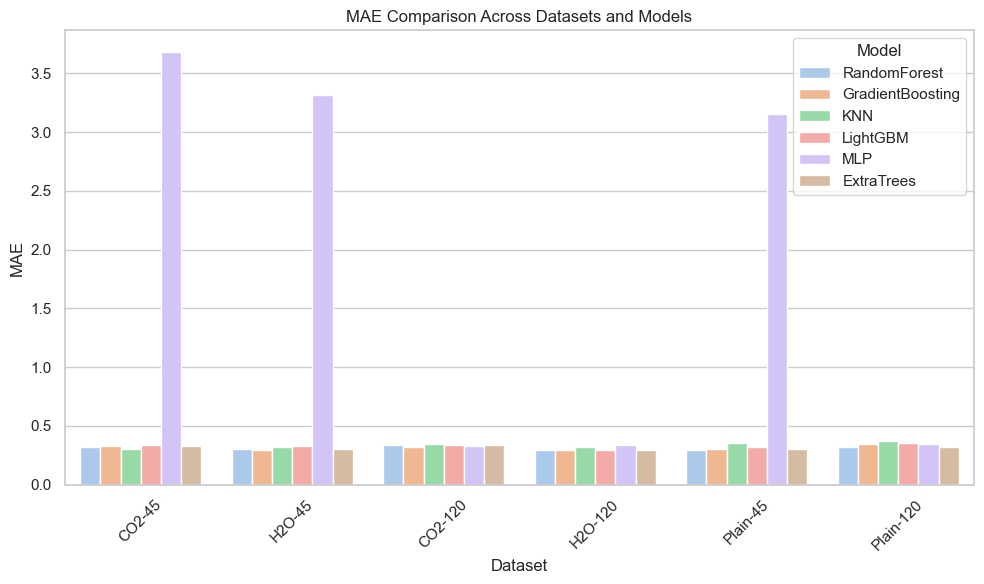

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the results
df = pd.read_csv("baseline_model_comparison.csv")

sns.set(style="whitegrid")

# Plot 1: RMSE visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Dataset", y="RMSE", hue="Model", palette="pastel")
plt.title("RMSE Comparison Across Datasets and Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: MAE visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Dataset", y="MAE", hue="Model", palette="pastel")
plt.title("MAE Comparison Across Datasets and Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Got probelm on MLP


In [134]:
pip install xgboost lightgbm

Note: you may need to restart the kernel to use updated packages.


In [140]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import lightgbm as lgb

base_folder = Path("/Users/viewyan/Documents/Datalab2025/4th meeting")

csv_files = {
    "CO2-45": "45_fingerprints_CO2.csv",
    "H2O-45": "45_fingerprints_H2O.csv",
    "CO2-120": "120_fingerprints_CO2.csv",
    "H2O-120": "120_fingerprints_H2O.csv",
    "Plain-45": "plain_fingerprint_45_mixed_energy.csv",
    "Plain-120": "plain_fingerprint_120_mixed_energy.csv"  # <-- 加了逗号就没问题了
}


#  Try models !!without!! MLP
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "LightGBM": lgb.LGBMRegressor(random_state=42),
    "ExtraTrees": ExtraTreesRegressor(random_state=42),

}

results = []

for label, filename in csv_files.items():
    path = base_folder / filename
    df = pd.read_csv(path).dropna()

    X = df.drop(columns=["mof_name", "energy"])
    y = df["energy"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)


        results.append({
            "Dataset": label,
            "Model": model_name,
            "RMSE": rmse,
            "MAE": mae
        })

results_df = pd.DataFrame(results)
print(results_df)

results_df.to_csv("baseline_model_comparison.csv", index=False)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7099
[LightGBM] [Info] Number of data points in the train set: 935, number of used features: 44
[LightGBM] [Info] Start training from score -0.075394
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7107
[LightGBM] [Info] Number of data points in the train set: 937, number of used features: 40
[LightGBM] [Info] Start training from score -0.212213
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

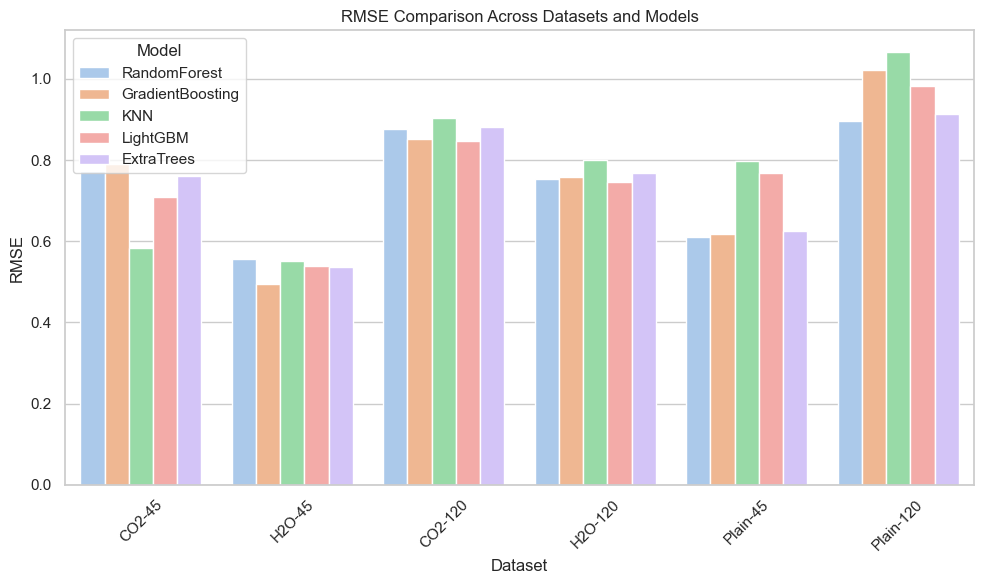

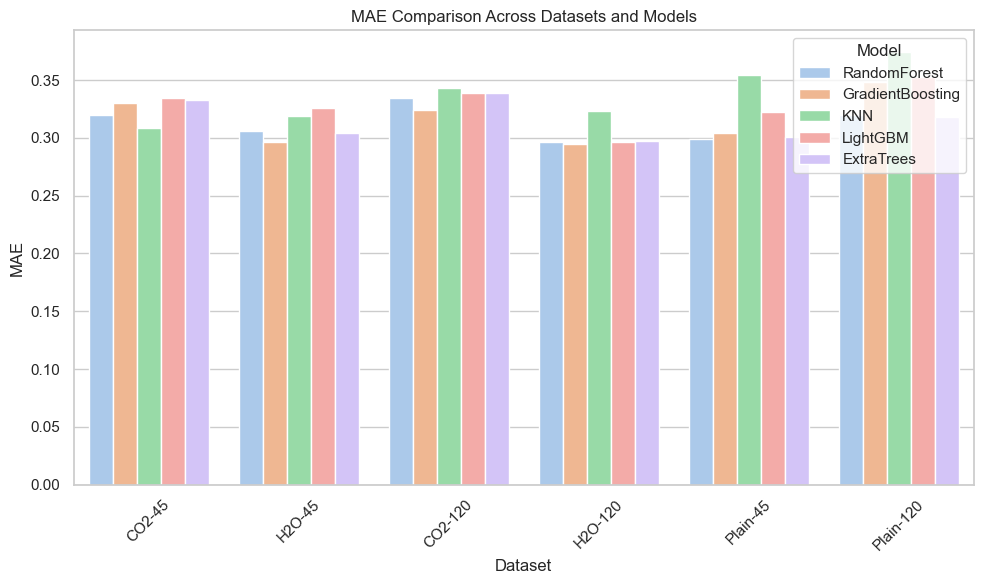

In [142]:
df = pd.read_csv("baseline_model_comparison.csv")

sns.set(style="whitegrid")

# 📊 Plot 1: RMSE visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Dataset", y="RMSE", hue="Model", palette="pastel")
plt.title("RMSE Comparison Across Datasets and Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📊 Plot 2: MAE visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Dataset", y="MAE", hue="Model", palette="pastel")
plt.title("MAE Comparison Across Datasets and Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#GrandientBoost best-45H20
#45维 fingerprint 更稳定，尤其在 Plain 数据上
#KNN 对高维数据不适用，表现退化严重，Plain-120 是误差最大的组合，应重点分析 residual 分布和特征重要性， LightGBM 和 GradientBoosting 是目前性能最均衡的模型组合


📊 MAE (SVR): 0.3099


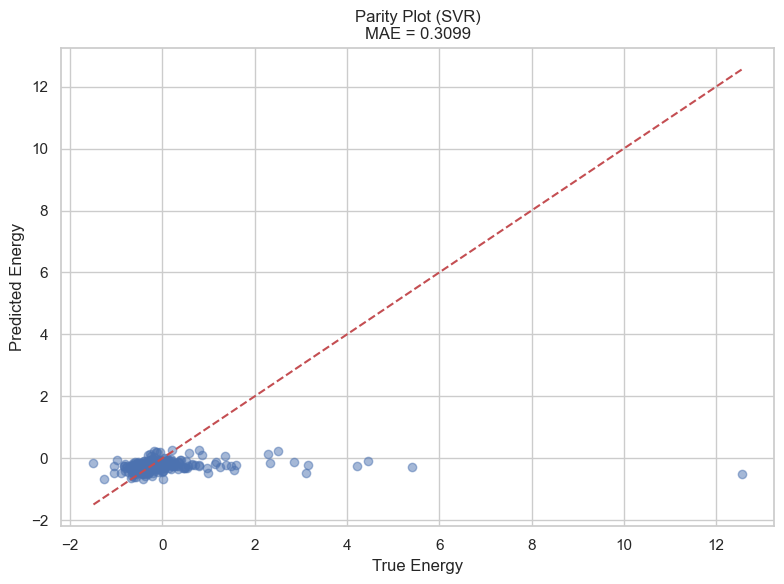

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# ✅ Load the merged fingerprint + adsorbate files
base_path = "/Users/viewyan/Documents/Datalab2025/4th meeting"
file_co2 = Path(base_path) / "plain_fingerprint_45_CO2_energy.csv"
file_h2o = Path(base_path) / "plain_fingerprint_45_H2O_energy.csv"

df_co2 = pd.read_csv(file_co2)
df_co2["adsorbate_type"] = "CO2"
df_h2o = pd.read_csv(file_h2o)
df_h2o["adsorbate_type"] = "H2O"
df_all = pd.concat([df_co2, df_h2o], ignore_index=True).dropna()

# ✅ Feature preprocessing
X_raw = df_all.drop(columns=["mof_name", "energy"])
y = df_all["energy"]

# One-hot encode adsorbate_type
encoder = OneHotEncoder(sparse_output=False, drop='first')
adsorbate_encoded = encoder.fit_transform(X_raw[["adsorbate_type"]])
adsorbate_df = pd.DataFrame(adsorbate_encoded, columns=encoder.get_feature_names_out(["adsorbate_type"]))

X_fp = X_raw.drop(columns=["adsorbate_type"])
X = pd.concat([X_fp.reset_index(drop=True), adsorbate_df.reset_index(drop=True)], axis=1)

# Feature scaling (SVR is sensitive to scale!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Train-test split + modeling
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = SVR(kernel="rbf")  # You can change kernel to 'linear' or 'poly'
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ✅ MAE output + visualization
mae = mean_absolute_error(y_test, y_pred)
print(f"📊 MAE (SVR): {mae:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
min_val, max_val = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.xlabel("True Energy")
plt.ylabel("Predicted Energy")
plt.title(f"Parity Plot (SVR)\nMAE = {mae:.4f}")
plt.tight_layout()
plt.show()

#Support Vector Regression (SVR) with RBF kernel
#Merged CO2 and H2O dataset with 45-dimensional fingerprints
#Performed well in the low-energy range,Model shows signs of underfitting

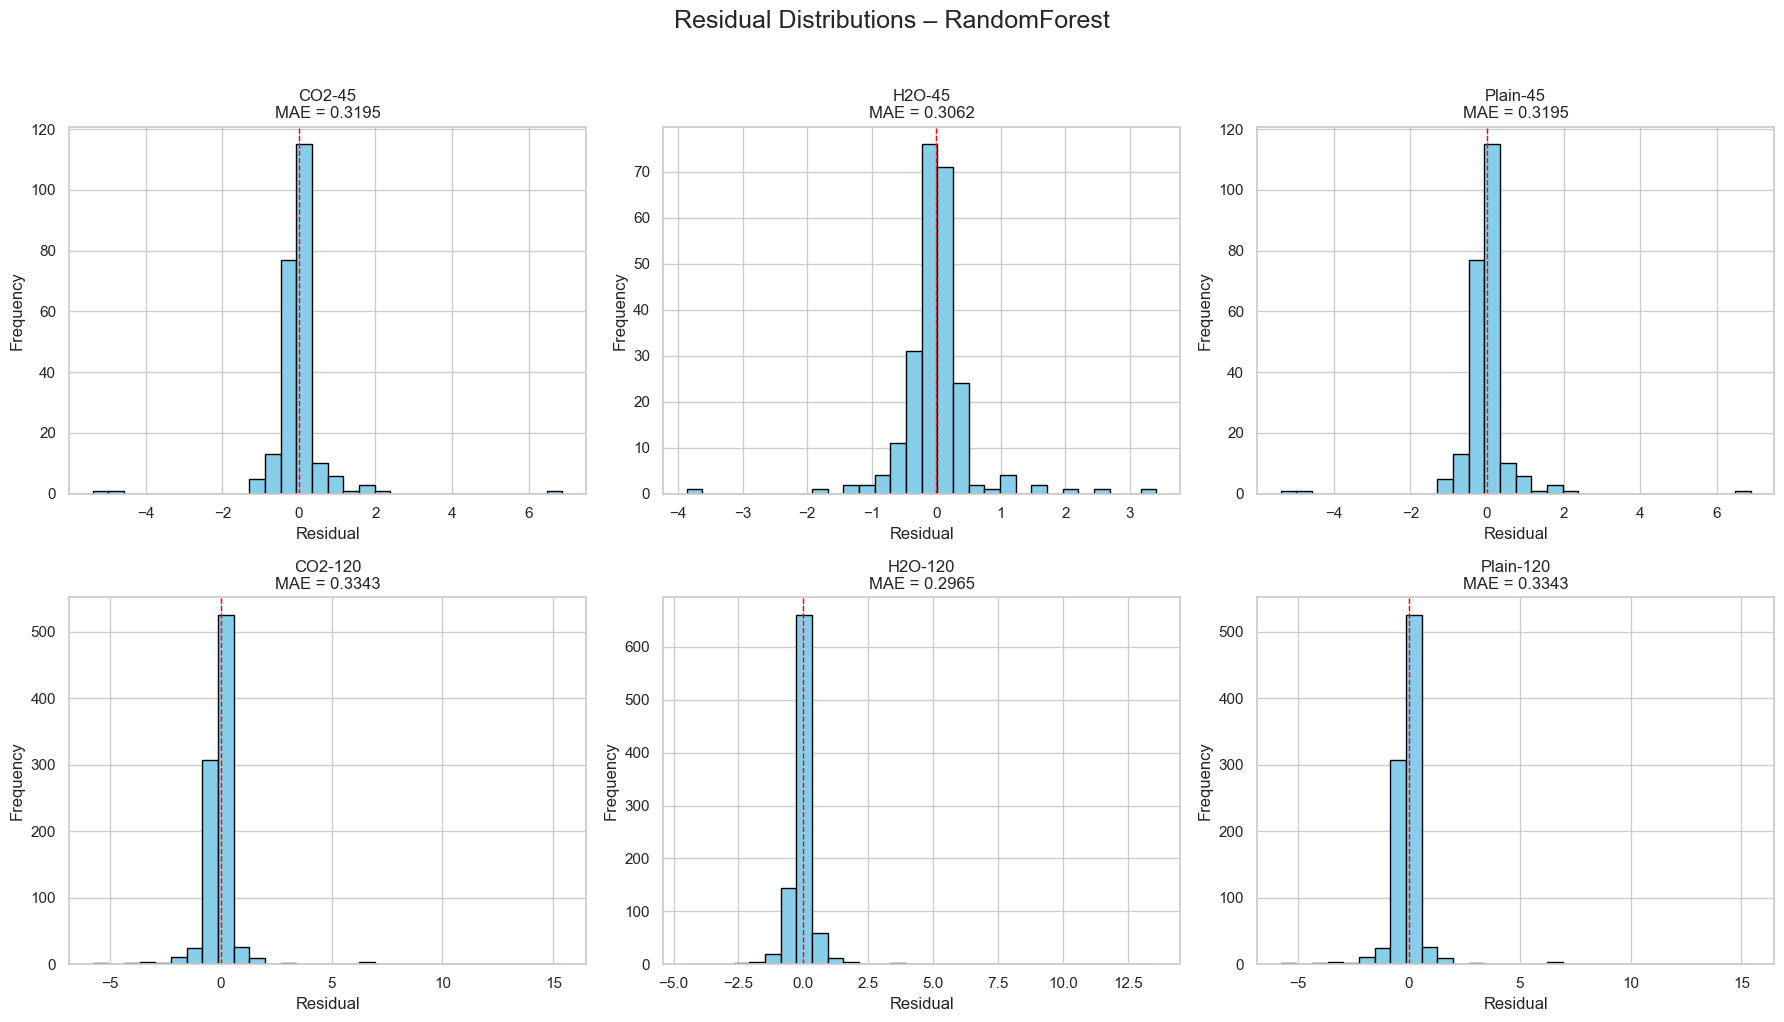

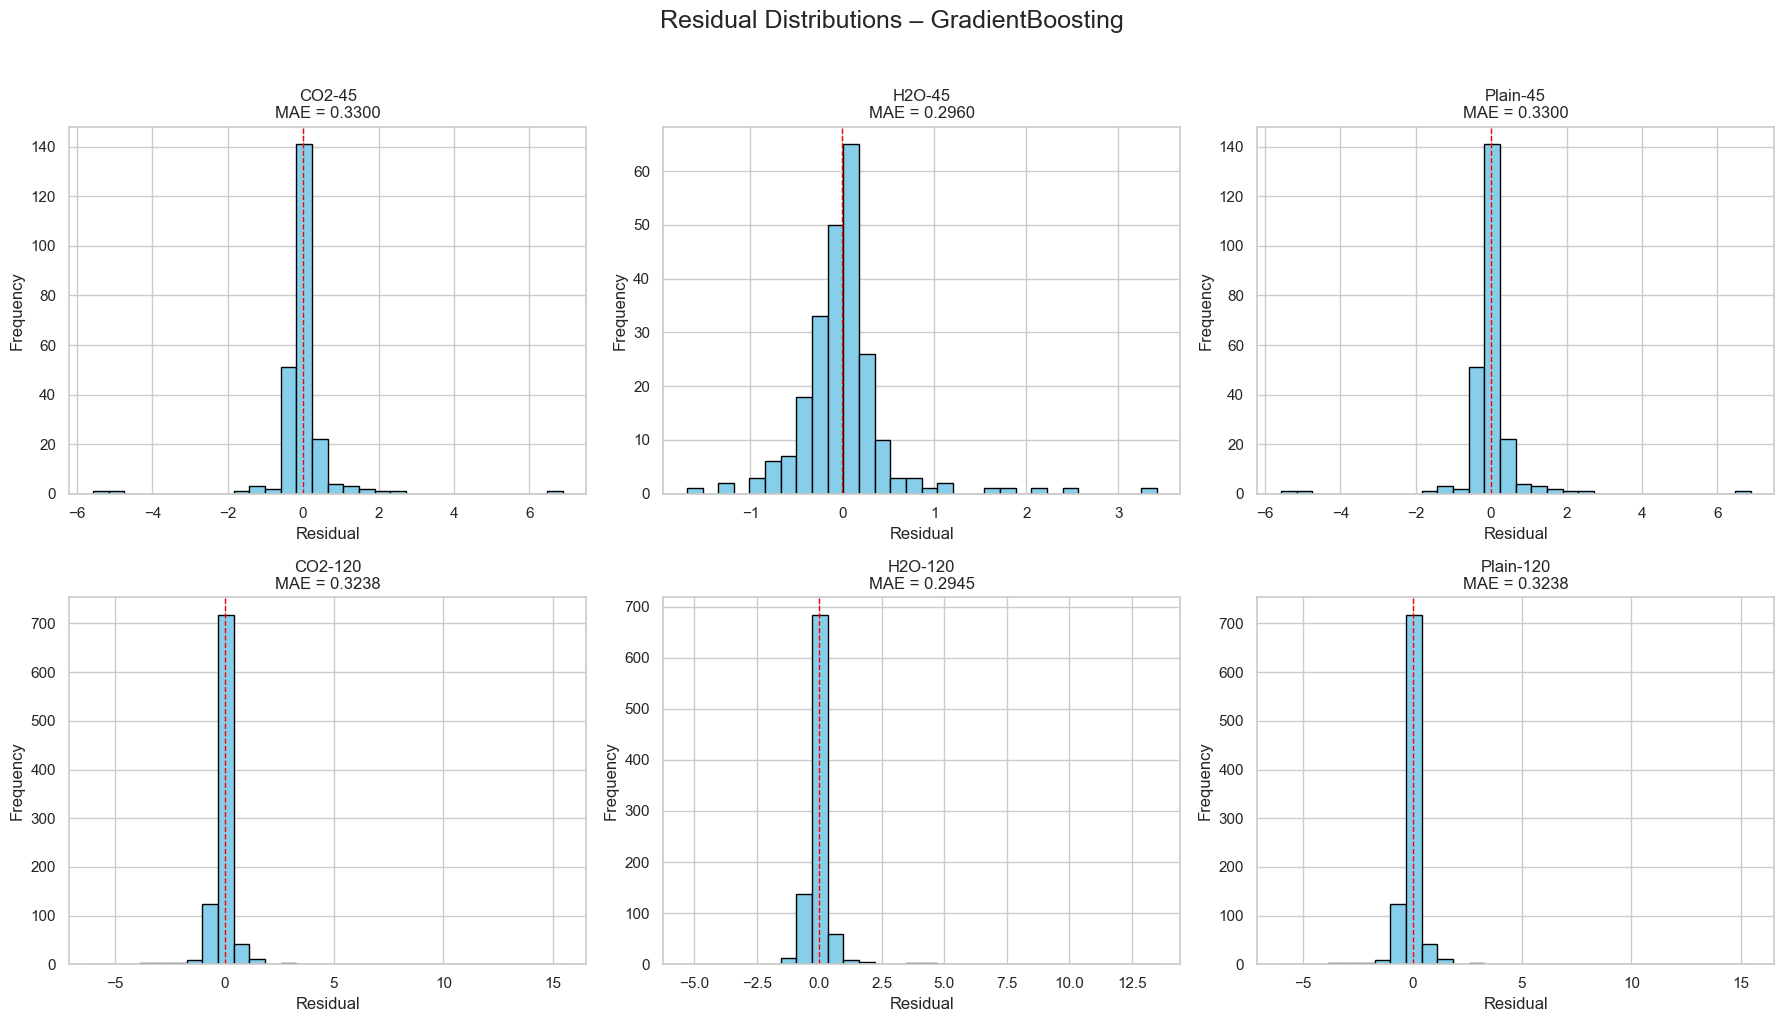

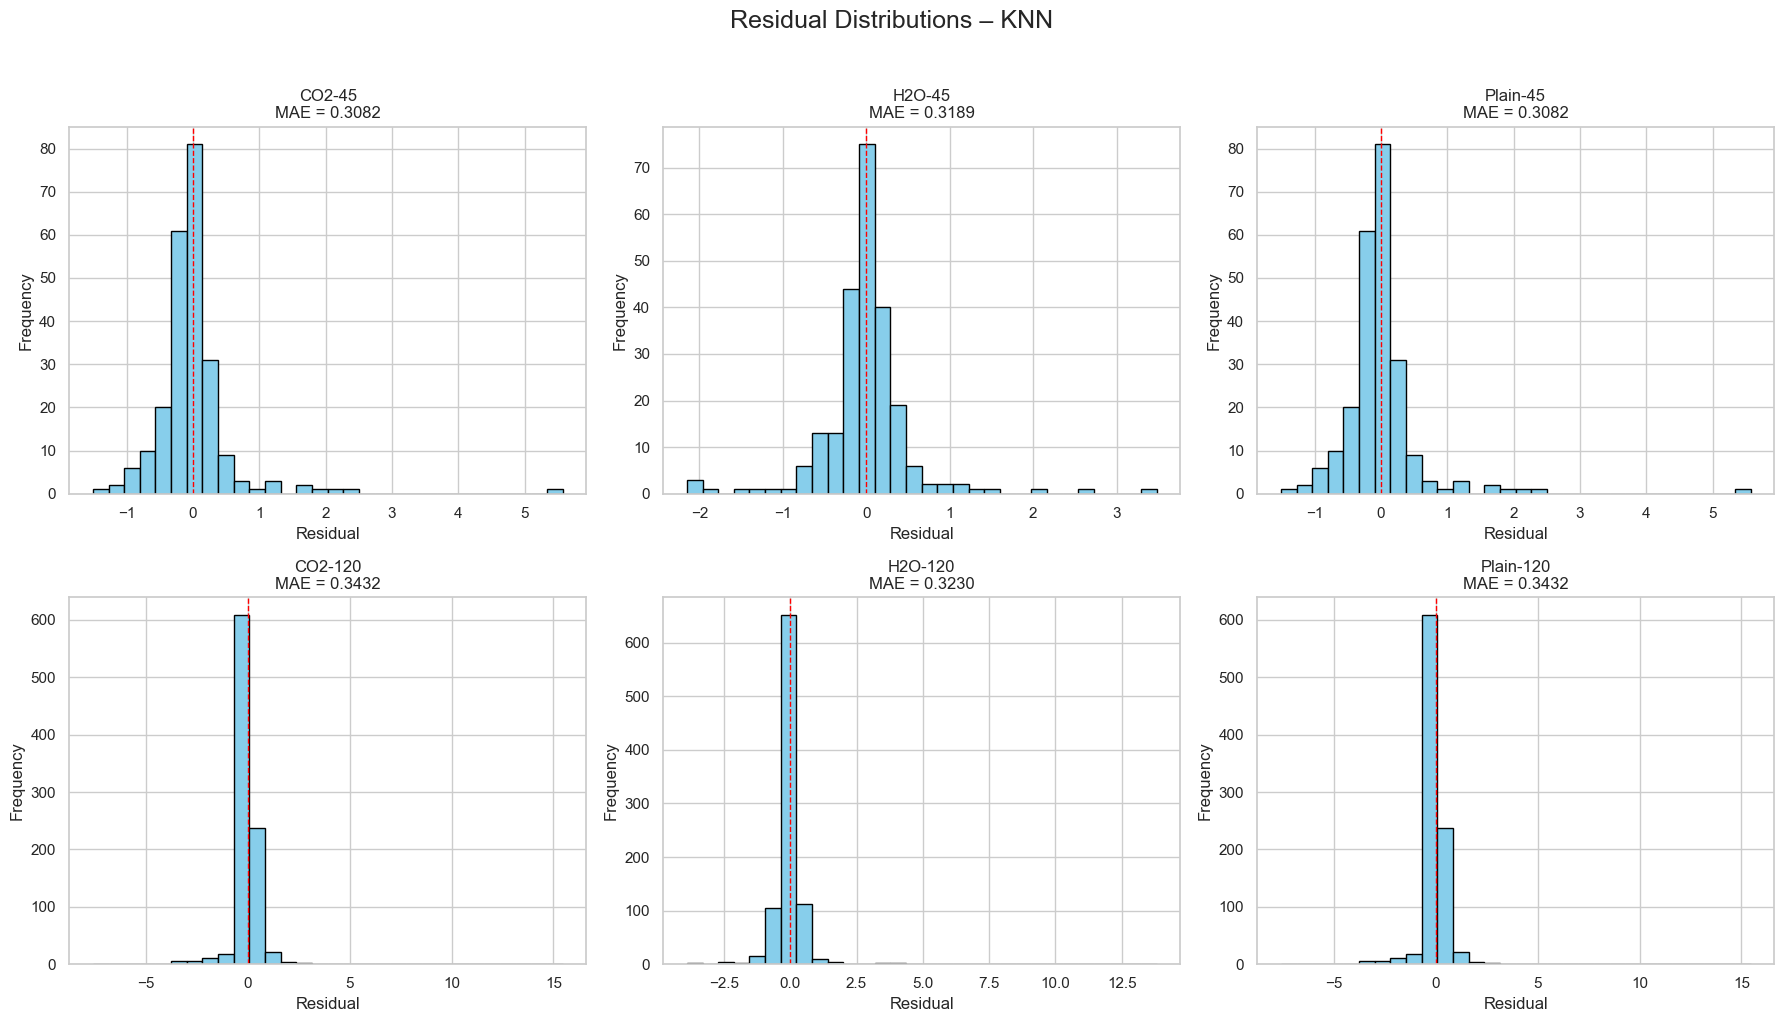

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7099
[LightGBM] [Info] Number of data points in the train set: 935, number of used features: 44
[LightGBM] [Info] Start training from score -0.075394
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7107
[LightGBM] [Info] Number of data points in the train set: 937, number of used features: 40
[LightGBM] [Info] Start training from score -0.212213
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000967 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7099
[LightGBM] [Info] Number of data points in the train set: 935, number of used features: 44
[LightGBM] [Info] Start trainin

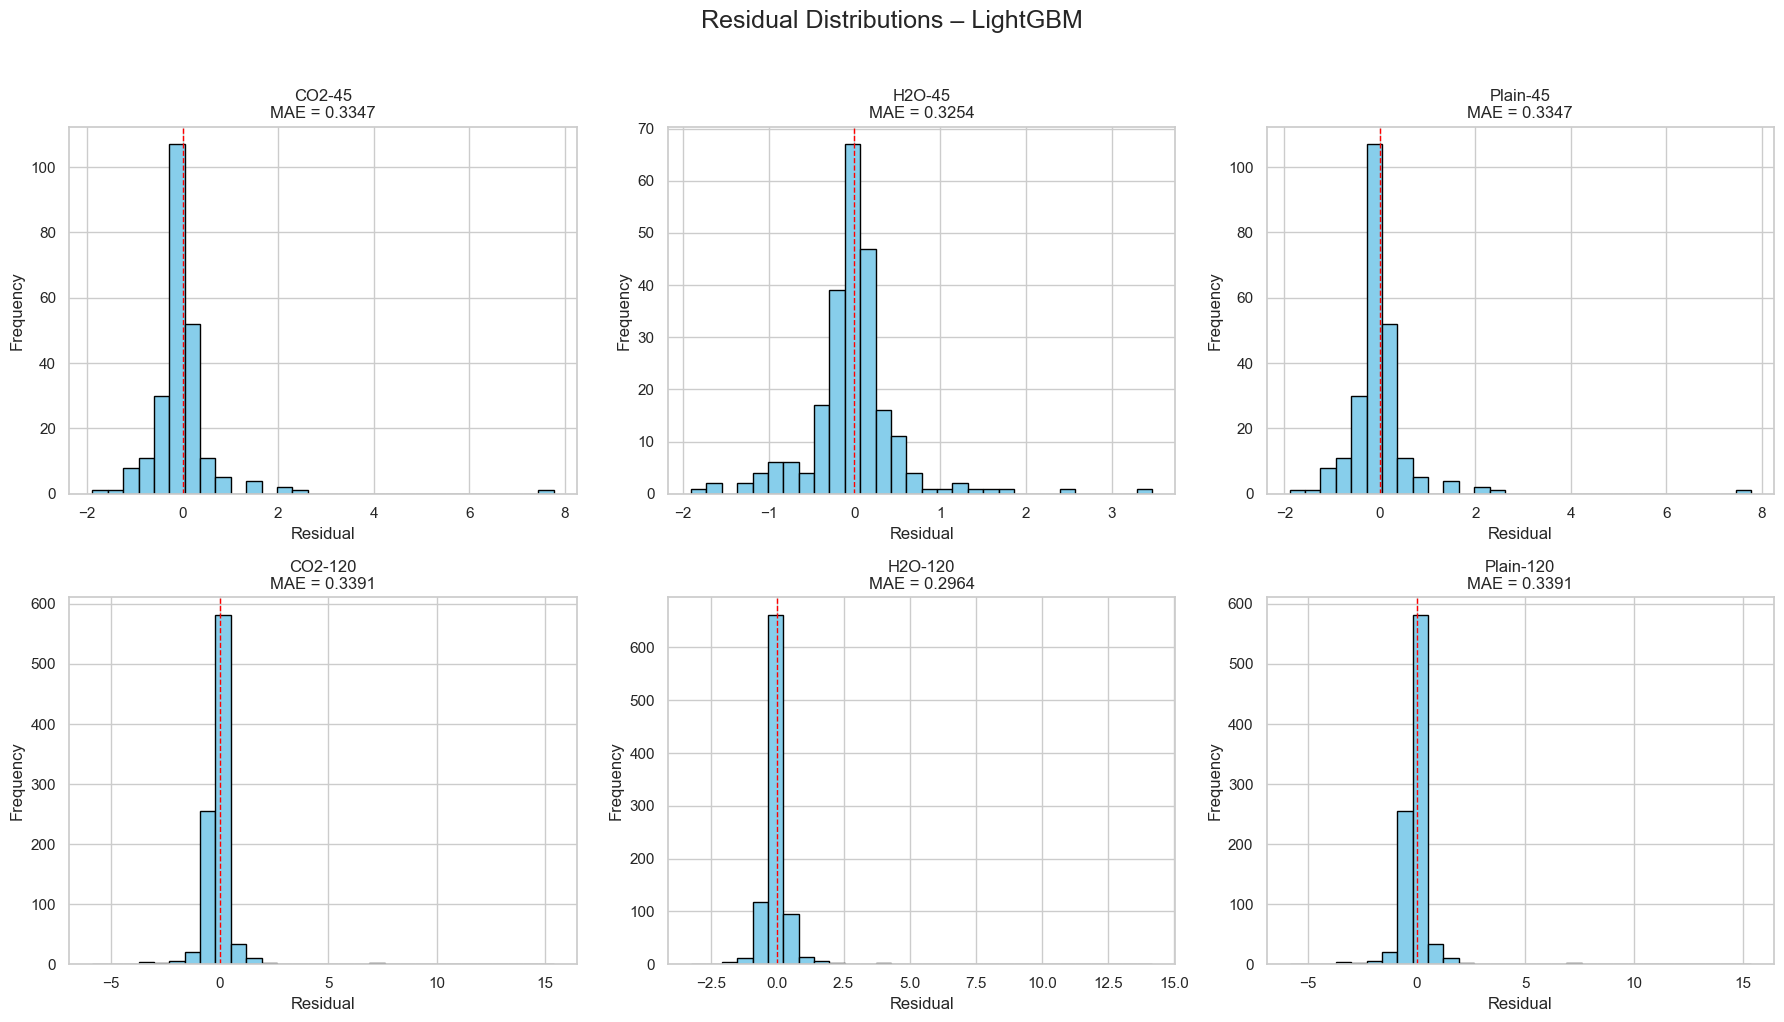

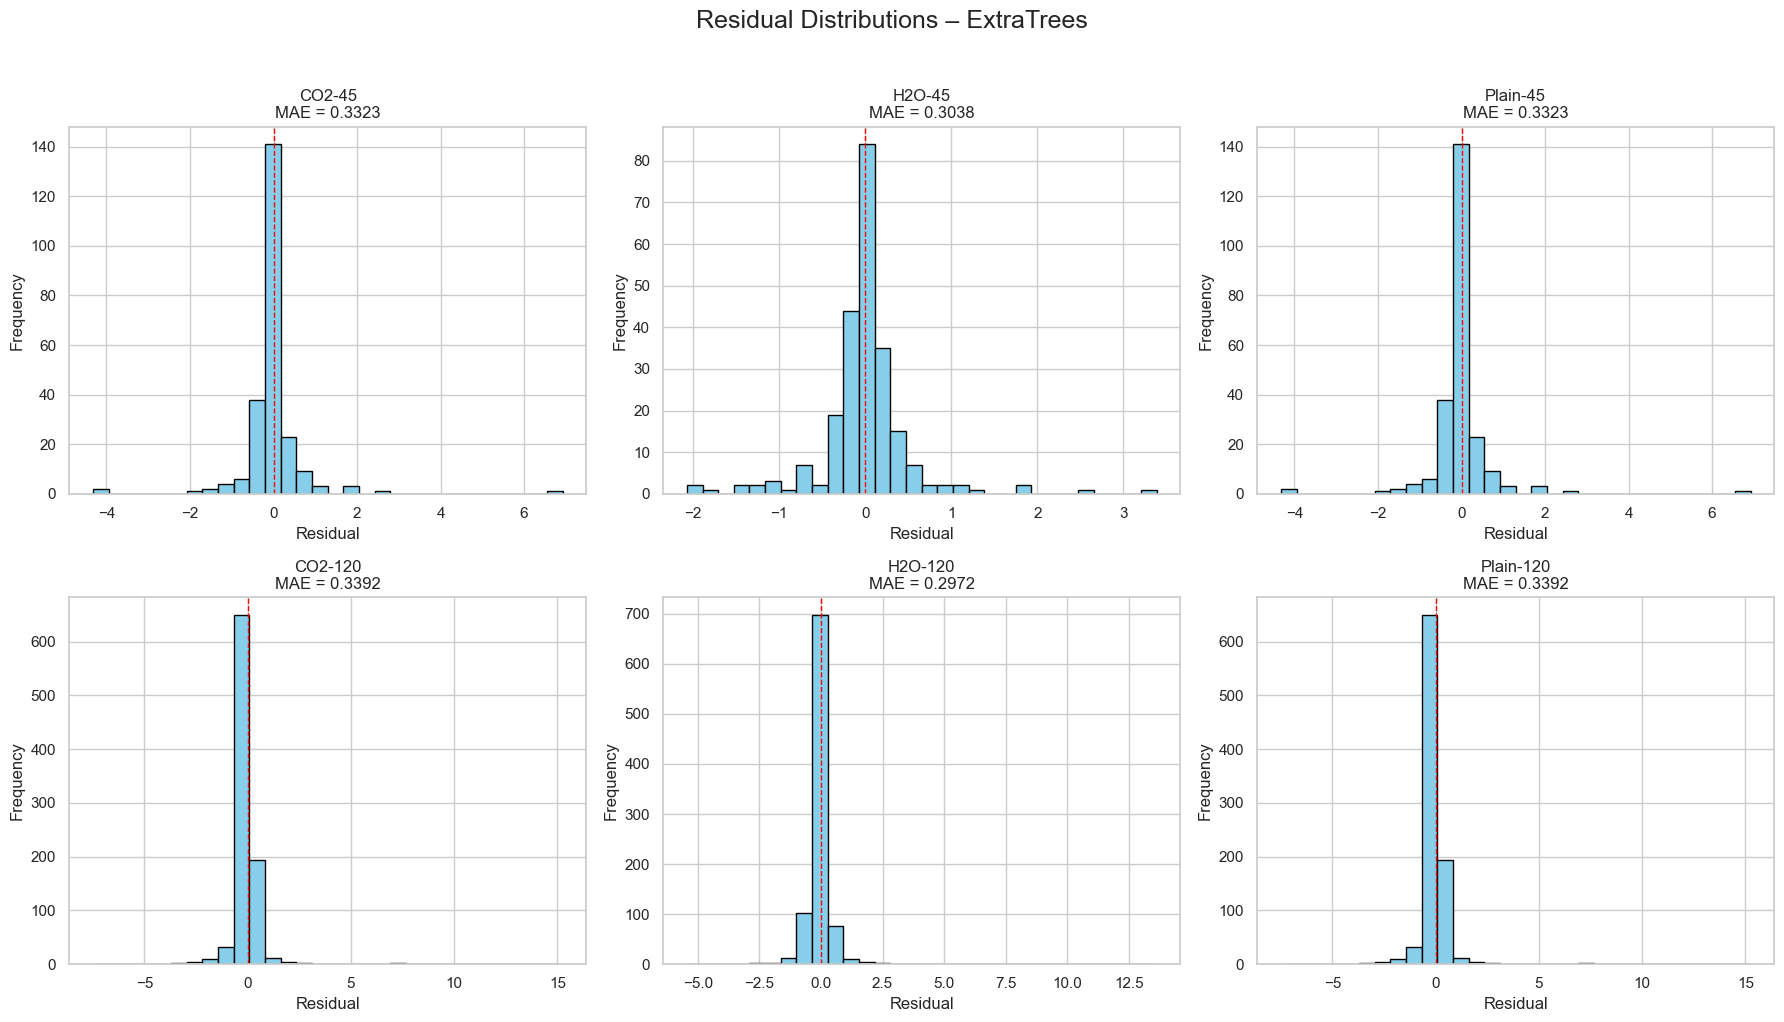

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

# Dataset mapping
base_path = "/Users/viewyan/Documents/Datalab2025/4th meeting"
files = {
    "CO2-45": "plain_fingerprint_45_CO2_energy.csv",
    "H2O-45": "plain_fingerprint_45_H2O_energy.csv",
    "Plain-45": "45_fingerprints_CO2.csv",
    "CO2-120": "plain_fingerprint_120_CO2_energy.csv",
    "H2O-120": "plain_fingerprint_120_H2O_energy.csv",
    "Plain-120": "120_fingerprints_CO2.csv",
}

# Models to test
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "LightGBM": LGBMRegressor(random_state=42),
    "ExtraTrees": ExtraTreesRegressor(random_state=42),
}

output_dir = Path(base_path) / "residual_plots"
output_dir.mkdir(exist_ok=True)

results = []

# For each model, draw 2×3 subplot of residuals
for model_name, model in models.items():
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for idx, (dataset_name, file) in enumerate(files.items()):
        df = pd.read_csv(Path(base_path) / file).dropna()

        X = df.drop(columns=["mof_name", "energy"])
        y = df["energy"]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        residuals = y_test - y_pred
        mae = mean_absolute_error(y_test, y_pred)

        # Fill subplot
        ax = axes[idx]
        ax.hist(residuals, bins=30, edgecolor='black', color='skyblue')
        ax.axvline(0, color='red', linestyle='--', linewidth=1)
        ax.set_title(f"{dataset_name}\nMAE = {mae:.4f}")
        ax.set_xlabel("Residual")
        ax.set_ylabel("Frequency")

        # Save single chart
        plt.figure(figsize=(6, 4))
        plt.hist(residuals, bins=30, edgecolor='black', color='skyblue')
        plt.axvline(0, color='red', linestyle='--')
        plt.title(f"Residual Distribution ({dataset_name}, {model_name})")
        plt.xlabel("Residual (True - Predicted)")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.savefig(output_dir / f"{dataset_name}_{model_name}_residual.png")
        plt.close()

        # Save numeric result
        results.append({
            "Dataset": dataset_name,
            "Model": model_name,
            "MAE": round(mae, 4)
        })

    plt.suptitle(f"Residual Distributions – {model_name}", fontsize=18, y=1.02)
    plt.tight_layout()
    plt.savefig(output_dir / f"all_datasets_{model_name}_residuals.png")
    plt.show()

# Save MAE results summary
results_df = pd.DataFrame(results)
results_df.to_csv(output_dir / "multi_model_MAE_comparison.csv", index=False)


/var/folders/xs/nvkfwrz93qsdq50h9rpm7sxc0000gn/T/ipykernel_99275/3110452766.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


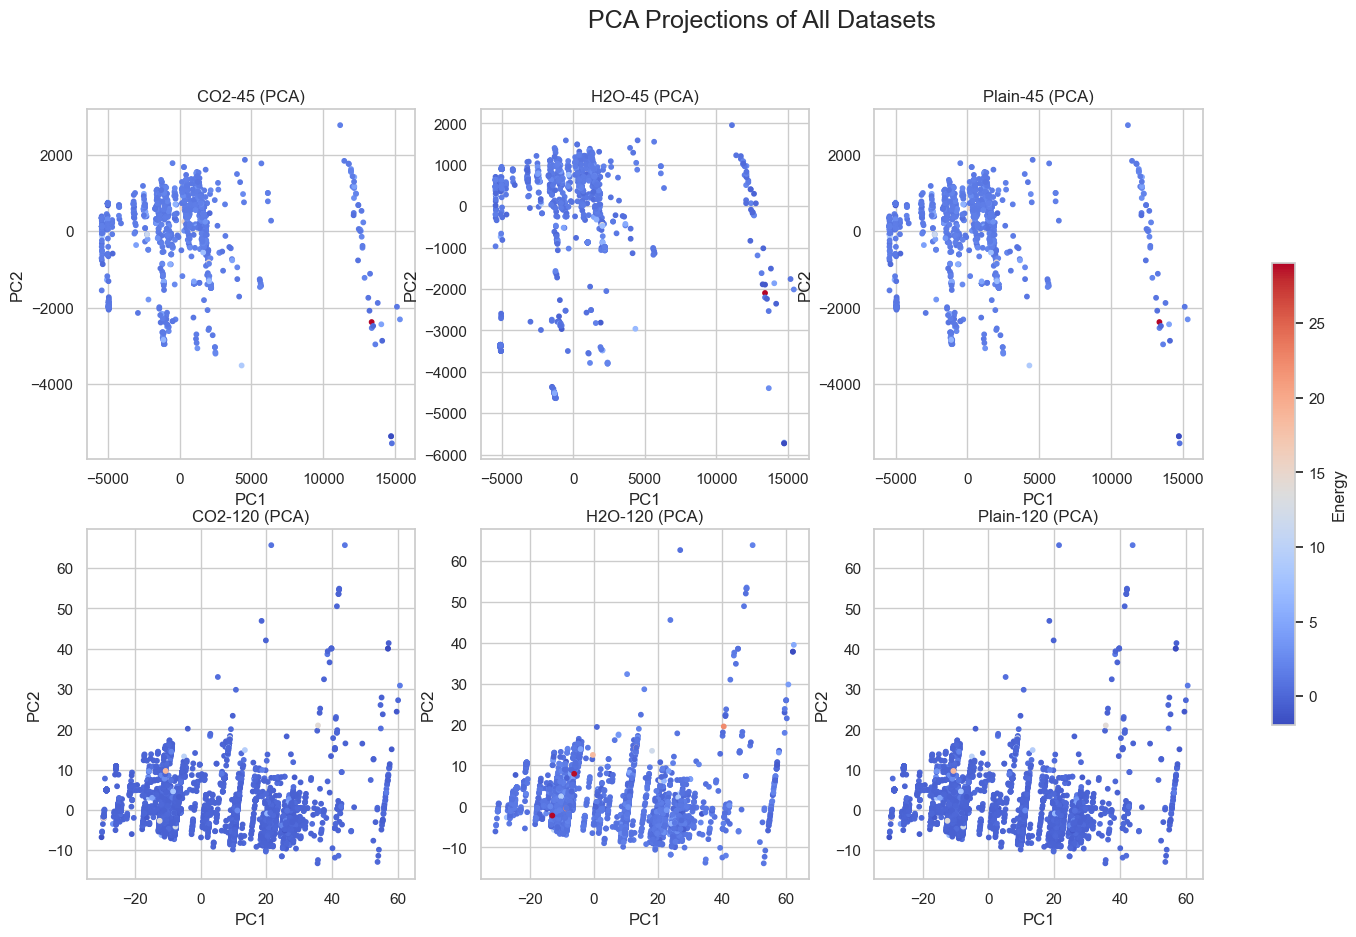

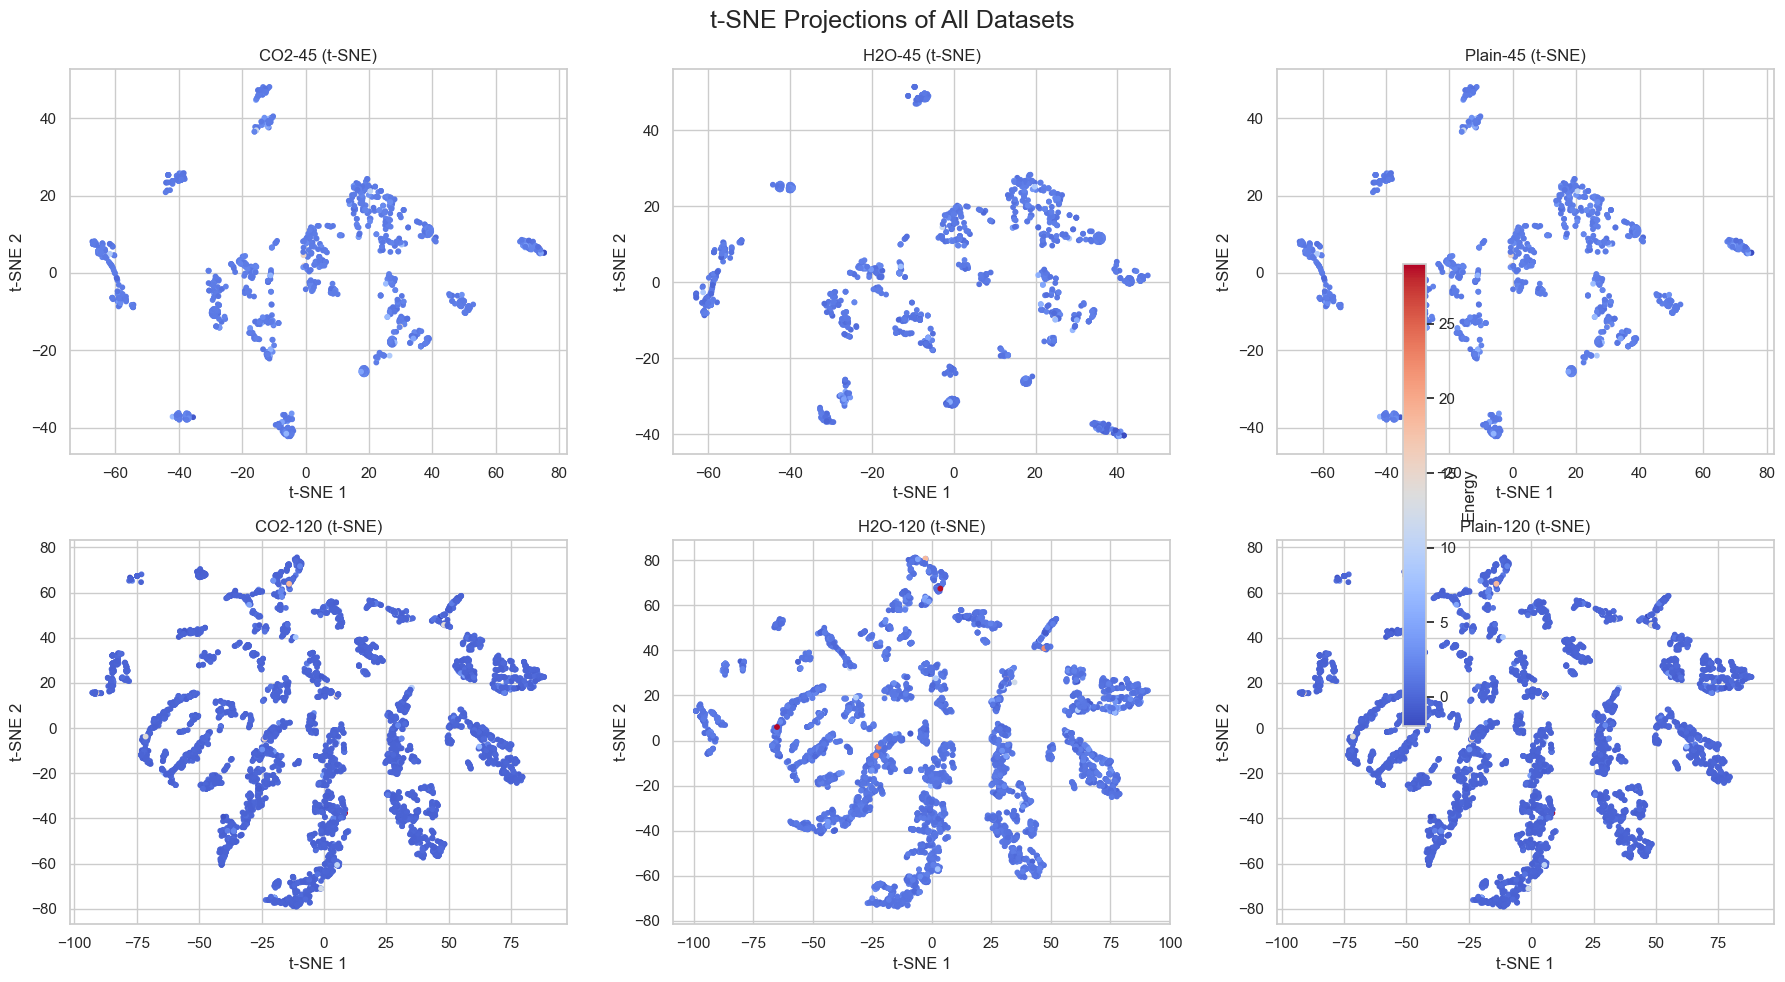

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pathlib import Path

# Base path and dataset map
base_path = Path("/Users/viewyan/Documents/Datalab2025/4th meeting")
files = {
    "CO2-45": "plain_fingerprint_45_CO2_energy.csv",
    "H2O-45": "plain_fingerprint_45_H2O_energy.csv",
    "Plain-45": "45_fingerprints_CO2.csv",
    "CO2-120": "plain_fingerprint_120_CO2_energy.csv",
    "H2O-120": "plain_fingerprint_120_H2O_energy.csv",
    "Plain-120": "120_fingerprints_CO2.csv",
}

fig_pca, axes_pca = plt.subplots(2, 3, figsize=(18, 10))
axes_pca = axes_pca.flatten()

fig_tsne, axes_tsne = plt.subplots(2, 3, figsize=(18, 10))
axes_tsne = axes_tsne.flatten()

# Loop through each dataset
for idx, (name, file) in enumerate(files.items()):
    df = pd.read_csv(base_path / file).dropna()
    X = df.drop(columns=["mof_name", "energy"])
    y = df["energy"]

    # Normalize if needed (optional)
    # from sklearn.preprocessing import StandardScaler
    # X = StandardScaler().fit_transform(X)

      # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    ax_p = axes_pca[idx]
    scatter_p = ax_p.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="coolwarm", s=10)
    ax_p.set_title(f"{name} (PCA)")
    ax_p.set_xlabel("PC1")
    ax_p.set_ylabel("PC2")

    # t-SNE
    tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(X)
    ax_t = axes_tsne[idx]
    scatter_t = ax_t.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="coolwarm", s=10)
    ax_t.set_title(f"{name} (t-SNE)")
    ax_t.set_xlabel("t-SNE 1")
    ax_t.set_ylabel("t-SNE 2")


fig_pca.suptitle("PCA Projections of All Datasets", fontsize=18)
fig_tsne.suptitle("t-SNE Projections of All Datasets", fontsize=18)

fig_pca.colorbar(scatter_p, ax=axes_pca, location="right", shrink=0.6, label="Energy")
fig_tsne.colorbar(scatter_t, ax=axes_tsne, location="right", shrink=0.6, label="Energy")

plt.tight_layout()
plt.show()


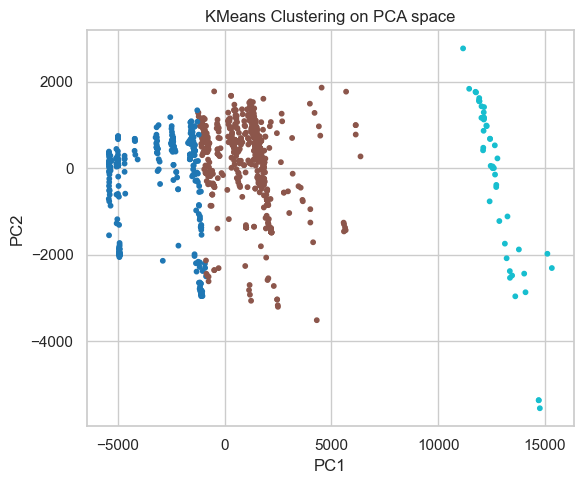

In [146]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

file_path = Path("/Users/viewyan/Documents/Datalab2025/4th meeting/plain_fingerprint_45_CO2_energy.csv")
df = pd.read_csv(file_path).dropna()
X = df.drop(columns=["mof_name", "energy"])

# Clustering Analysis with KMeans-Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="tab10", s=10)
plt.title("KMeans Clustering on PCA space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()


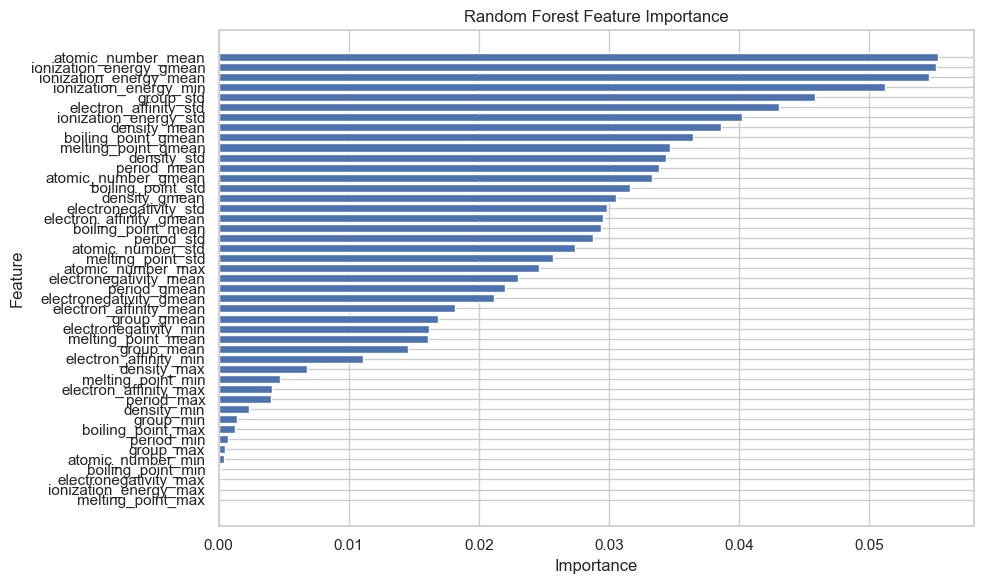

In [147]:
from sklearn.ensemble import RandomForestRegressor

columns = X.columns
rf = RandomForestRegressor(random_state=42)
rf.fit(X, df["energy"])
importances = rf.feature_importances_

# Feature Importance Plot (RandomForest)-Plot feature importances
importances_df = pd.DataFrame({"Feature": columns, "Importance": importances})
importances_df = importances_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances_df["Feature"], importances_df["Importance"])
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


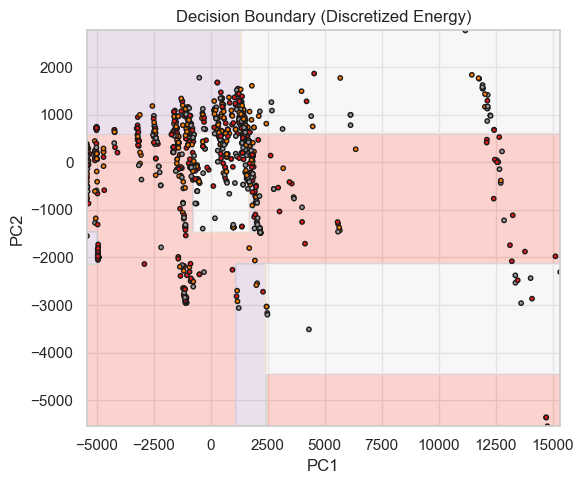

In [148]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

# Decision Boundary Visualization (Discretized Energy)-Reduce dimensionality
X_2d = PCA(n_components=2).fit_transform(X)

# Discretize energy into 3 bins
y_class = KBinsDiscretizer(n_bins=3, encode="ordinal").fit_transform(df[["energy"]]).ravel()

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_2d, y_class)

# Create mesh grid for prediction
xx, yy = np.meshgrid(np.linspace(X_2d[:, 0].min(), X_2d[:, 0].max(), 300),
                     np.linspace(X_2d[:, 1].min(), X_2d[:, 1].max(), 300))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, cmap="Pastel1", alpha=0.6)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_class, cmap="Set1", edgecolor="k", s=10)
plt.title("Decision Boundary (Discretized Energy)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()
#updatee